In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv(r"C:\Users\Manika\Moblie-Liked-or-Not\Dataset\train.csv")
data_test = pd.read_csv(r"C:\Users\Manika\Moblie-Liked-or-Not\Dataset\test.csv")

In [3]:
data_train.head()

,PhoneId,Also Known As,Applications,Architecture,Aspect Ratio,Audio Features,Audio Jack,Autofocus,Bezel-less display,Bluetooth,...,Video Recording,Video Recording Features,VoLTE,Waterproof,Weight,Wi-Fi,Wi-Fi Features,Width,Wireless Charging,Rating
0,0,NaN,NaN,64 bit,19:9,NaN,3.5 mm,Phase Detection autofocus,yes,v5.0,...,1920x1080 @ 30 fps,NaN,yes,NaN,182 grams Below Average ▾Weight compared to11 ...,"Wi-Fi 802.11, a/b/g/n","Wi-Fi Direct, Mobile Hotspot",76.4 mm,NaN,4.5
1,1,NaN,Oppo Browser,64 bit,19:9,NaN,3.5 mm,Phase Detection autofocus,yes,v4.2,...,1920x1080 @ 30 fps,NaN,yes,NaN,168 grams Average ▾Weight compared to8 - 12 K ...,"Wi-Fi 802.11, b/g/n",Mobile Hotspot,75.6 mm,NaN,4.5
2,2,NaN,NaN,64 bit,19.5:9,NaN,3.5 mm,yes,yes,v4.2,...,NaN,NaN,yes,NaN,168 grams Average ▾Weight compared to10 - 14 K...,"Wi-Fi 802.11, b/g/n",Mobile Hotspot,74 mm,NaN,4.4
3,4,NaN,NaN,64 bit,18.5:9,Dolby Atmos,3.5 mm,No,yes,v5.0,...,1920x1080 @ 30 fps,NaN,yes,NaN,169 grams Average ▾Weight compared to15 - 23 K...,"Wi-Fi 802.11, a/ac/b/g/n","Wi-Fi Direct, Mobile Hotspot",76.8 mm,NaN,4.3
4,5,NaN,NaN,64 bit,19.5:9,NaN,3.5 mm,Phase Detection autofocus,yes,v4.2,...,1920x1080 @ 60 fps,NaN,yes,NaN,175 grams Below Average ▾Weight compared to12 ...,"Wi-Fi 802.11, a/ac/b/g/n",Mobile Hotspot,76.6 mm,NaN,4.4


In [4]:
data_train.shape

(355, 99)

In [5]:
data_train.describe()

,PhoneId,Rating Count,Review Count,Rating
count,355.000000,3.550000e+02,355.000000,355.000000
mean,235.267606,3.344979e+04,6648.228169,4.071549
std,137.204594,1.151661e+05,18943.317868,0.372663
min,0.000000,1.000000e+00,1.000000,2.500000
25%,113.500000,6.585000e+02,228.000000,3.900000
50%,234.000000,3.744000e+03,951.000000,4.100000
75%,358.000000,1.613650e+04,4208.500000,4.300000
max,472.000000,1.268083e+06,218020.000000,5.000000


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 99 columns):
PhoneId                                        355 non-null int64
Also Known As                                  17 non-null object
Applications                                   43 non-null object
Architecture                                   273 non-null object
Aspect Ratio                                   204 non-null object
Audio Features                                 30 non-null object
Audio Jack                                     343 non-null object
Autofocus                                      333 non-null object
Bezel-less display                             154 non-null object
Bluetooth                                      351 non-null object
Brand                                          354 non-null object
Browser                                        23 non-null object
Build Material                                 102 non-null object
Camera Features              

In [7]:
#columns_remove = ["Also Known As", "Applications", "Audio Features", "Browser", "Build Material", "Display Colour", "Email", "HDMI", "Heart Rate Monitor",
                #"Mobile High-Definition Link(MHL)", "Music", "Other Facilities", "Ring Tone", "Ruggedness", "USB Type-C", "Video Player", "Waterproof",
                # "Wireless Charging", "IRIS Scanner", "Java", "Architecture"]
#data_train.drop(columns_remove, axis = 1, inplace=True)
#data_test.drop(columns_remove, axis = 1, inplace=True)

In [8]:
data_train=data_train.dropna(thresh=len(data_train) - 50, axis=1)

In [9]:
data_train.head()

,PhoneId,Audio Jack,Autofocus,Bluetooth,Brand,Camera Features,Capacity,Chipset,Colours,Display Type,...,Thickness,Touch Screen,Type,USB Connectivity,User Replaceable,Weight,Wi-Fi,Wi-Fi Features,Width,Rating
0,0,3.5 mm,Phase Detection autofocus,v5.0,Xiaomi,"Digital Zoom, Auto Flash, Face detection, Touc...",4000 mAh,Qualcomm Snapdragon 636,"Black, Blue, Red, Rose Gold",IPS LCD,...,8.2 mm Very Good ▾Thickness compared to11 - 17...,"Capacitive Touchscreen, Multi-touch",Li-Polymer,"Mass storage device, USB charging, microUSB 2.0",No,182 grams Below Average ▾Weight compared to11 ...,"Wi-Fi 802.11, a/b/g/n","Wi-Fi Direct, Mobile Hotspot",76.4 mm,4.5
1,1,3.5 mm,Phase Detection autofocus,v4.2,Realme,"2 x Digital Zoom, Auto Flash, Face detection, ...",4230 mAh,Qualcomm Snapdragon 450,"Diamond Black, Diamond Blue, Diamond Red",IPS LCD,...,8.2 mm Very Good ▾Thickness compared to8 - 12 ...,"Capacitive Touchscreen, Multi-touch",Li-ion,"Mass storage device, USB charging, microUSB 2.0",No,168 grams Average ▾Weight compared to8 - 12 K ...,"Wi-Fi 802.11, b/g/n",Mobile Hotspot,75.6 mm,4.5
2,2,3.5 mm,yes,v4.2,Realme,"2 x Digital Zoom, Auto Flash, Face detection, ...",3500 mAh,MediaTek Helio P70,"Brave Blue, Fiery Gold, Ambitious Black",IPS LCD,...,8 mm Very Good ▾Thickness compared to10 - 14 K...,"Capacitive Touchscreen, Multi-touch",Li-ion,"Mass storage device, USB charging, microUSB 2.0",No,168 grams Average ▾Weight compared to10 - 14 K...,"Wi-Fi 802.11, b/g/n",Mobile Hotspot,74 mm,4.4
3,4,3.5 mm,No,v5.0,Samsung,"Digital Zoom, Auto Flash, Face detection, Touc...",3300 mAh,Samsung Exynos 7 Octa 7885,"Black, Blue, Gold",Super AMOLED,...,7.5 mm Very Good ▾Thickness compared to15 - 23...,"Capacitive Touchscreen, Multi-touch",Li-ion,"Mass storage device, USB charging, microUSB 2.0",No,169 grams Average ▾Weight compared to15 - 23 K...,"Wi-Fi 802.11, a/ac/b/g/n","Wi-Fi Direct, Mobile Hotspot",76.8 mm,4.3
4,5,3.5 mm,Phase Detection autofocus,v4.2,Honor,"Digital Zoom, Auto Flash, Face detection, Touc...",3750 mAh,HiSilicon Kirin 710,"Black, Blue, Red",IPS LCD,...,7.8 mm Very Good ▾Thickness compared to12 - 18...,"Capacitive Touchscreen, Multi-touch",Li-Polymer,"Mass storage device, USB charging, microUSB 2.0",No,175 grams Below Average ▾Weight compared to12 ...,"Wi-Fi 802.11, a/ac/b/g/n",Mobile Hotspot,76.6 mm,4.4


In [10]:
data_train.var()

PhoneId         1.882510e+04
Rating Count    1.326323e+10
Review Count    3.588493e+08
Rating          1.388775e-01
dtype: float64

In [11]:
data_train.columns

Index(['PhoneId', 'Audio Jack', 'Autofocus', 'Bluetooth', 'Brand',
       'Camera Features', 'Capacity', 'Chipset', 'Colours', 'Display Type',
       'Expandable Memory', 'Fingerprint Sensor', 'Flash', 'GPS', 'Graphics',
       'Height', 'Image Resolution', 'Internal Memory', 'Launch Date',
       'Loudspeaker', 'Model', 'Network', 'Network Support',
       'Operating System', 'Other Sensors', 'Pixel Density', 'Processor',
       'RAM', 'Rating Count', 'Resolution', 'Review Count', 'SIM 1', 'SIM 2',
       'SIM Size', 'SIM Slot(s)', 'Screen Resolution', 'Screen Size',
       'Screen to Body Ratio (calculated)', 'Shooting Modes', 'Thickness',
       'Touch Screen', 'Type', 'USB Connectivity', 'User Replaceable',
       'Weight', 'Wi-Fi', 'Wi-Fi Features', 'Width', 'Rating'],
      dtype='object')

In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 49 columns):
PhoneId                              355 non-null int64
Audio Jack                           343 non-null object
Autofocus                            333 non-null object
Bluetooth                            351 non-null object
Brand                                354 non-null object
Camera Features                      348 non-null object
Capacity                             354 non-null object
Chipset                              329 non-null object
Colours                              354 non-null object
Display Type                         354 non-null object
Expandable Memory                    353 non-null object
Fingerprint Sensor                   335 non-null object
Flash                                342 non-null object
GPS                                  333 non-null object
Graphics                             325 non-null object
Height                               340 

In [13]:
data_train["Rating"].value_counts()

4.3    45
4.1    42
4.4    42
4.0    40
4.2    38
3.9    30
4.5    25
3.8    17
3.7    15
3.4    11
3.5    11
4.6    10
3.6     8
3.3     5
3.0     4
2.8     2
4.8     2
5.0     2
3.1     2
4.7     2
3.2     1
2.5     1
Name: Rating, dtype: int64

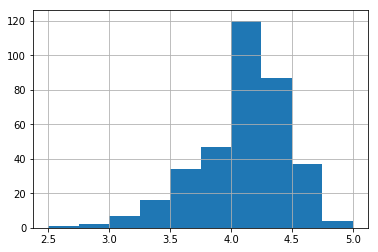

In [14]:
data_train["Rating"].hist()

In [15]:
data_train[data_train["Rating"]>4.5]

,PhoneId,Audio Jack,Autofocus,Bluetooth,Brand,Camera Features,Capacity,Chipset,Colours,Display Type,...,Thickness,Touch Screen,Type,USB Connectivity,User Replaceable,Weight,Wi-Fi,Wi-Fi Features,Width,Rating
28,42,3.5 mm,Phase Detection autofocus,v5.0,Vivo,"Digital Zoom, Auto Flash, Face detection, Touc...",4000 mAh,Qualcomm Snapdragon 845,Black,Super AMOLED,...,7.9 mm Very Good ▾Thickness compared to26 - 40...,"Capacitive Touchscreen, Multi-touch",Li-ion,"Mass storage device, USB charging",No,199 grams Poor ▾Weight compared to26 - 40 K Ph...,"Wi-Fi 802.11, a/ac/b/g/n, MIMO",Mobile Hotspot,77 mm,4.6
42,58,3.5 mm,yes,v5.0,Samsung,Wide Angle Selfie,3500 mAh,Samsung Exynos 9 Octa 9810,"Midnight Black, Coral Blue, Lilac Purple, Burg...",Super AMOLED,...,8.5 mm Very Good ▾Thickness compared to40 - 90...,"Capacitive Touchscreen, Multi-touch",Li-ion,"Mass storage device, USB charging",No,189 grams Poor ▾Weight compared to40 - 90 K Ph...,"Wi-Fi 802.11, a/ac/b/g/n/n 5GHz, MIMO","Wi-Fi Direct, Mobile Hotspot",73.8 mm,4.6
56,73,USB Type-C,Phase Detection autofocus,v5.0,OPPO,"10 x Digital Zoom, Auto Flash, Face detection,...",3730 mAh,Qualcomm Snapdragon 845,"Bordeaux Red, Glacier Blue",AMOLED,...,9.6 mm Average ▾Thickness compared to40 - 90 K...,"Capacitive Touchscreen, Multi-touch",Li-Polymer,"Mass storage device, USB charging",No,186 grams Poor ▾Weight compared to40 - 90 K Ph...,"Wi-Fi 802.11, a/ac/b/g/n",Mobile Hotspot,74.2 mm,4.6
77,99,Lightning,Phase Detection autofocus,v5.0,Apple,"10 x Digital Zoom, 2 x Optical Zoom, Auto Flas...",3174 mAh,Apple A12 Bionic,"Gold, Silver, Space Grey",OLED,...,7.7 mm Very Good ▾Thickness compared toAll Pho...,"3D Touch Touchscreen, Multi-touch",Li-ion,USB 2.0,No,208 grams Poor ▾Weight compared toAll PhonesTh...,"Wi-Fi 802.11, a/ac/b/g/n/n 5GHz, MIMO",Mobile Hotspot,77.4 mm,4.6
110,144,Lightning,Phase Detection autofocus,v5.0,Apple,"10 x Digital Zoom, 2 x Optical Zoom, Auto Flas...",2675 mAh,Apple A11 Bionic,"Gold, Red, Silver, Space Grey",IPS LCD,...,7.5 mm Very Good ▾Thickness compared to40 - 90...,"3D Touch Touchscreen, Multi-touch",Li-ion,"USB 2.0, Proprietary",No,202 grams Poor ▾Weight compared to40 - 90 K Ph...,"Wi-Fi 802.11, a/ac/b/g/n/n 5GHz, MIMO",Mobile Hotspot,78.1 mm,4.6
111,145,USB Type-C,yes,v5.0,Google,"Digital Zoom, Auto Flash, Face detection, Touc...",3430 mAh,Qualcomm Snapdragon 845,"Just Black, Not Pink , Clearly White",OLED,...,7.9 mm Very Good ▾Thickness compared to40 - 90...,"Capacitive Touchscreen, Multi-touch",Li-ion,"Mass storage device, USB charging",No,184 grams Poor ▾Weight compared to40 - 90 K Ph...,"Wi-Fi 802.11, a/ac/b/g/n/n 5GHz, MIMO",Mobile Hotspot,76.7 mm,4.8
157,207,USB Type-C,yes,v5.0,Google,"Digital Zoom, Auto Flash, Face detection, Touc...",2915 mAh,Qualcomm Snapdragon 845,"Clearly White, Just Black, Not Pink",OLED,...,7.9 mm Very Good ▾Thickness compared to40 - 90...,"Capacitive Touchscreen, Multi-touch",Li-ion,"Mass storage device, USB charging",No,148 grams Good ▾Weight compared to40 - 90 K Ph...,"Wi-Fi 802.11, a/ac/b/g/n/n 5GHz, MIMO",Mobile Hotspot,68.2 mm,4.6
169,224,USB Type-C,yes,v4.1,Ulefone,"Digital Zoom, Auto Flash, Face detection, Touc...",13000 mAh,MediaTek MT6763T,Black,IPS LCD,...,15.8 mm Poor ▾Thickness compared to32 - 48 K P...,"Capacitive Touchscreen, Multi-touch",Li-Polymer,"Mass storage device, USB charging",No,330 grams Poor ▾Weight compared to32 - 48 K Ph...,"Wi-Fi 802.11, b/g/n/n 5GHz",Mobile Hotspot,80.2 mm,4.7
176,233,3.5 mm,Phase Detection autofocus,v4.0,Tecno,"Digital Zoom, Auto Flash, Face detection, Touc...",4000 mAh,MediaTek MT6750T,"Champagne Gold, Sky Black, Space Grey",IPS LCD,...,7.7 mm Very Good ▾Thickness compared to7 - 11 ...,"Capacitive Touchscreen, Multi-touch",Li-ion,"Mass storage device, USB charging, microUSB 2.0",No,155 grams Average ▾Weight compared to7 - 11 K ...,"Wi-Fi 802.11, b/g/n",Mobile Hotspot,75.2 mm,4.8
179,237,3.5 mm,yes,v4.1,Tecno,"Digital Zoom, Auto Flash, Face detection, Touc...",3750 mAh,MediaTek Helio A22,

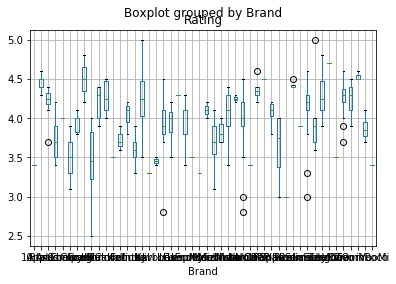

In [16]:
data_train.boxplot(column="Rating", by="Brand")
plt.show()

In [17]:
data_train["Capacity"].value_counts()

3000 mAh     64
4000 mAh     47
3300 mAh     16
3500 mAh     13
2000 mAh     10
3200 mAh     10
3750 mAh      9
5000 mAh      9
2600 mAh      8
2900 mAh      8
3260 mAh      7
3050 mAh      6
2400 mAh      5
2700 mAh      5
800 mAh       5
2500 mAh      5
3800 mAh      4
3180 mAh      4
1200 mAh      4
3080 mAh      4
2800 mAh      4
3400 mAh      4
4030 mAh      3
3010 mAh      3
4100 mAh      3
2300 mAh      3
2730 mAh      3
4230 mAh      3
3174 mAh      3
3100 mAh      3
             ..
1750 mAh      1
3450 mAh      1
1500 mAh      1
2990 mAh      1
3510 mAh      1
1821 mAh      1
4070 mAh      1
4550 mAh      1
2675 mAh      1
1850 mAh      1
3225 mAh      1
3520 mAh      1
3055 mAh      1
1600 mAh      1
8000 mAh      1
2750 mAh      1
2670 mAh      1
2070 mAh      1
4200 mAh      1
5300 mAh      1
2420 mAh      1
2630 mAh      1
5020 mAh      1
1642 mAh      1
13000 mAh     1
2050 mAh      1
2550 mAh      1
2470 mAh      1
2350 mAh      1
2150 mAh      1
Name: Capacity, Length: 

In [18]:
def for_integer(test):
    try:
        test = test.strip()
        return int(test.split(' ')[0])
    except IOError:
           pass
    except ValueError:
        pass
    except:
        pass

def for_string(test):
    try:
        test = test.strip()
        return (test.split(' ')[0])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

def for_float(test):
    try:
        test = test.strip()
        return float(test.split(' ')[0])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass
def find_freq(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[2][0] == '(':
            return float(test[2][1:])
        return float(test[2])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

    
def for_Internal_Memory(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[1] == 'GB':
            return int(test[0])
        if test[1] == 'MB':
#             print("here")
            return (int(test[0]) * 0.001)
    except IOError:
           pass
    except ValueError:
        pass
    except:
        pass
    
def find_freq(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[2][0] == '(':
            return float(test[2][1:])
        return float(test[2])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

In [21]:
data_train['Capacity'] = data_train['Capacity'].apply(for_integer)

data_train['Height'] = data_train['Height'].apply(for_float)
data_train['Height'] = data_train['Height'].fillna(data_train['Height'].mean())

data_train['Internal Memory'] = data_train['Internal Memory'].apply(for_Internal_Memory)

data_train['Pixel Density'] = data_train['Pixel Density'].apply(for_integer)

data_train['Internal Memory'] = data_train['Internal Memory'].fillna(data_train['Internal Memory'].median())
data_train['Internal Memory'] = data_train['Internal Memory'].astype(int)

data_train['RAM'] = data_train['RAM'].apply(for_integer)
data_train['RAM'] = data_train['RAM'].fillna(data_train['RAM'].median())
data_train['RAM'] = data_train['RAM'].astype(int)

data_train['Resolution'] = data_train['Resolution'].apply(for_integer)
data_train['Resolution'] = data_train['Resolution'].fillna(data_train['Resolution'].median())
data_train['Resolution'] = data_train['Resolution'].astype(int)

data_train['Screen Size'] = data_train['Screen Size'].apply(for_float)

data_train['Thickness'] = data_train['Thickness'].apply(for_float)
data_train['Thickness'] = data_train['Thickness'].fillna(data_train['Thickness'].mean())
data_train['Thickness'] = data_train['Thickness'].round(2)

data_train['Type'] = data_train['Type'].fillna('Li-Polymer')

data_train['Screen to Body Ratio (calculated)'] = data_train['Screen to Body Ratio (calculated)'].apply(for_float)
data_train['Screen to Body Ratio (calculated)'] = data_train['Screen to Body Ratio (calculated)'].fillna(data_train['Screen to Body Ratio (calculated)'].mean())
data_train['Screen to Body Ratio (calculated)'] = data_train['Screen to Body Ratio (calculated)'].round(2)

data_train['Width'] = data_train['Width'].apply(for_float)
data_train['Width'] = data_train['Width'].fillna(data_train['Width'].mean())
data_train['Width'] = data_train['Width'].round(2)

data_train['Flash'][data_train['Flash'].isna() == True] = "Other"

data_train['User Replaceable'][data_train['User Replaceable'].isna() == True] = "Other"

data_train['Num_cores'] = data_train['Processor'].apply(for_string)
data_train['Num_cores'][data_train['Num_cores'].isna() == True] = "Other"


data_train['Processor_frequency'] = data_train['Processor'].apply(find_freq)
#because there is one entry with 208MHz values, to convert it to GHz
data_train['Processor_frequency'][data_train['Processor_frequency'] > 200] = 0.208
data_train['Processor_frequency'] = data_train['Processor_frequency'].fillna(data_train['Processor_frequency'].mean())
data_train['Processor_frequency'] = data_train['Processor_frequency'].round(2)

data_train['Camera Features'][data_train['Camera Features'].isna() == True] = "Other"

#simplifyig Operating System to os_name for simplicity
data_train['os_name'] = data_train['Operating System'].apply(for_string)
data_train['os_name'][data_train['os_name'].isna() == True] = "Other"

data_train['Sim1'] = data_train['SIM 1'].apply(for_string)

data_train['SIM Size'][data_train['SIM Size'].isna() == True] = "Other"

data_train['Image Resolution'][data_train['Image Resolution'].isna() == True] = "Other"

data_train['Fingerprint Sensor'][data_train['Fingerprint Sensor'].isna() == True] = "Other"

data_train['Expandable Memory'][data_train['Expandable Memory'].isna() == True] = "No"

data_train['Weight'] = data_train['Weight'].apply(for_integer)
data_train['Weight'] = data_train['Weight'].fillna(data_train['Weight'].mean())
data_train['Weight'] = data_train['Weight'].astype(int)

data_train['SIM 2'] = data_train['SIM 2'].apply(for_string)
data_train['SIM 2'][data_train['SIM 2'].isna() == True] = "Other"

C:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Python\Anaconda\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

In [22]:
data_train.head()

,PhoneId,Audio Jack,Autofocus,Bluetooth,Brand,Camera Features,Capacity,Chipset,Colours,Display Type,...,User Replaceable,Weight,Wi-Fi,Wi-Fi Features,Width,Rating,Num_cores,Processor_frequency,os_name,Sim1
0,0,3.5 mm,Phase Detection autofocus,v5.0,Xiaomi,"Digital Zoom, Auto Flash, Face detection, Touc...",4000.0,Qualcomm Snapdragon 636,"Black, Blue, Red, Rose Gold",IPS LCD,...,No,182,"Wi-Fi 802.11, a/b/g/n","Wi-Fi Direct, Mobile Hotspot",76.4,4.5,Octa,1.8,Android,4G
1,1,3.5 mm,Phase Detection autofocus,v4.2,Realme,"2 x Digital Zoom, Auto Flash, Face detection, ...",4230.0,Qualcomm Snapdragon 450,"Diamond Black, Diamond Blue, Diamond Red",IPS LCD,...,No,168,"Wi-Fi 802.11, b/g/n",Mobile Hotspot,75.6,4.5,Octa,1.8,Android,4G
2,2,3.5 mm,yes,v4.2,Realme,"2 x Digital Zoom, Auto Flash, Face detection, ...",3500.0,MediaTek Helio P70,"Brave Blue, Fiery Gold, Ambitious Black",IPS LCD,...,No,168,"Wi-Fi 802.11, b/g/n",Mobile Hotspot,74.0,4.4,Octa,2.1,Android,4G
3,4,3.5 mm,No,v5.0,Samsung,"Digital Zoom, Auto Flash, Face detection, Touc...",3300.0,Samsung Exynos 7 Octa 7885,"Black, Blue, Gold",Super AMOLED,...,No,169,"Wi-Fi 802.11, a/ac/b/g/n","Wi-Fi Direct, Mobile Hotspot",76.8,4.3,Octa,2.2,Android,4G
4,5,3.5 mm,Phase Detection autofocus,v4.2,Honor,"Digital Zoom, Auto Flash, Face detection, Touc...",3750.0,HiSilicon Kirin 710,"Black, Blue, Red",IPS LCD,...,No,175,"Wi-Fi 802.11, a/ac/b/g/n",Mobile Hotspot,76.6,4.4,Octa,2.2,Android,4G
